1、导入必要的包

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2、读取训练数据集

In [2]:
train_data_path = r"./data/train.csv"
df = pd.read_csv(train_data_path)

## 1、 单个特征分布、特征对结果的影响

3、查看数据集top 5，包括数据集的特征种类和数量

In [3]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


4、查看特征的类型

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
id                  float64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


5、查看匿名特征的分布

In [5]:
df[['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']].describe()

,C1,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07
mean,1.004968e+03,1.884181e+04,3.188831e+02,6.010201e+01,2.112601e+03,1.432499e+00,2.271444e+02,5.321685e+04,8.338229e+01
std,1.094586e+00,4.959457e+03,2.127250e+01,4.729538e+01,6.094124e+02,1.326227e+00,3.510221e+02,4.995682e+04,7.028996e+01
min,1.001000e+03,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,1.005000e+03,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,1.005000e+03,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.005000e+03,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02
max,1.012000e+03,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02


In [37]:
#点击率统计
P_A=df['click'].value_counts()[1]/df['click'].value_counts().sum()
print(df['click'].value_counts())
print('点击概率为',P_A)

False    33563901
True      6865066
Name: click, dtype: int64
点击概率为 0.16980562476404604


In [38]:
var=[ 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
#筛选出点击率为1的事件
train_df_click=df[df['click']==1]
for v in var:
    print('\n%s属性的取值和次数'%v)
    P=pd.concat([df[v].value_counts(),df[v].value_counts(normalize=True),\
                   train_df_click[v].value_counts(normalize=True)],\
                   axis=1,join_axes=[df[v].value_counts().index],keys=['特征分布','P_C','P_C|A']).fillna(0)
    #P(A│ci)=(P(ci│A)P(A))/(P(ci))
    P['P_A|C']=(P['P_C|A']*P_A)/P['P_C']
    P['概率提升比%']=(P['P_A|C']-P_A)*100/P_A
    print(P)


hour属性的取值和次数
                       特征分布       P_C     P_C|A     P_A|C     概率提升比%
2014-10-22 09:00:00  447783  0.011076  0.009091  0.139376 -17.920537
2014-10-22 10:00:00  438270  0.010840  0.008913  0.139613 -17.780952
2014-10-28 13:00:00  432308  0.010693  0.008606  0.136662 -19.518670
2014-10-22 12:00:00  408650  0.010108  0.008174  0.137323 -19.129362
2014-10-28 14:00:00  387453  0.009584  0.008243  0.146051 -13.989149
2014-10-22 11:00:00  386757  0.009566  0.007606  0.135015 -20.488494
2014-10-30 04:00:00  347806  0.008603  0.005387  0.106321 -37.386783
2014-10-28 09:00:00  328576  0.008127  0.005920  0.123694 -27.155319
2014-10-22 13:00:00  323480  0.008001  0.006291  0.133520 -21.369008
2014-10-22 08:00:00  322803  0.007984  0.006772  0.144010 -15.191011
2014-10-28 08:00:00  291763  0.007217  0.005523  0.129951 -23.470518
2014-10-22 06:00:00  288819  0.007144  0.006734  0.160055  -5.742074
2014-10-22 05:00:00  286697  0.007091  0.006106  0.146221 -13.889440
2014-10-28 16:00:00 

              特征分布           P_C         P_C|A     P_A|C      概率提升比%
c4e18dd6  15131739  3.742796e-01  2.705616e-01  0.122750  -27.711385
f3845767   6486150  1.604332e-01  1.942828e-01  0.205633   21.098825
7e091613   3325008  8.224321e-02  1.251321e-01  0.258357   52.148831
7687a86e   1290165  3.191190e-02  8.641781e-02  0.459836  170.801252
98572c79    996816  2.465598e-02  3.983880e-02  0.274370   61.578624
16a36ef3    855686  2.116517e-02  1.773195e-02  0.142261  -16.221093
58a89a43    765891  1.894411e-02  4.769947e-03  0.042755  -74.820957
9d54950b    375891  9.297566e-03  6.151580e-03  0.112349  -33.836668
b12b9f85    373925  9.248938e-03  4.077310e-03  0.074857  -55.915914
17d996e6    353600  8.746204e-03  1.693167e-02  0.328725   93.588727
968765cd    343703  8.501404e-03  5.303809e-03  0.105937  -37.612553
28f93029    315842  7.812270e-03  8.098684e-03  0.176031    3.666209
bd6d812f    310760  7.686568e-03  5.496233e-03  0.121418  -28.495621
d262cf1e    289921  7.171121e-03  

              特征分布           P_C         P_C|A     P_A|C      概率提升比%
7801e8d9  27237087  6.737023e-01  7.731741e-01  0.194877   14.764948
2347f47a   5240885  1.296319e-01  1.054380e-01  0.138114  -18.663538
ae637522   1881838  4.654677e-02  6.518947e-03  0.023782  -85.994847
5c5a694b   1129228  2.793116e-02  3.200246e-02  0.194557   14.576188
82e27996    759125  1.877676e-02  5.331049e-03  0.048211  -71.608261
d9b5648e    713924  1.765872e-02  1.154759e-02  0.111041  -34.606859
0e8616ad    660510  1.633754e-02  6.812170e-03  0.070803  -58.303581
b9528b13    646193  1.598342e-02  1.702576e-02  0.180879    6.521440
b8d325c3    534000  1.320835e-02  1.807310e-02  0.232346   36.830828
aefc06bd    298769  7.389974e-03  3.112716e-03  0.071523  -57.879202
df32afa9    291502  7.210226e-03  1.184111e-03  0.027887  -83.577340
33da2e74    259530  6.419407e-03  4.534989e-03  0.119959  -29.355016
6f7ca2ba    226100  5.592525e-03  7.467226e-03  0.226727   33.521556
5b9c592b    104413  2.582628e-03  

            特征分布           P_C         P_C|A     P_A|C      概率提升比%
6b9769f2  208701  5.162165e-03  6.698697e-03  0.220349   29.765271
431b3174  135322  3.347155e-03  3.839147e-03  0.194765   14.698838
2f323f36   88499  2.189000e-03  1.272238e-03  0.098690  -41.880382
af9205f9   87844  2.172799e-03  1.229121e-03  0.096057  -43.431411
930ec31d   86996  2.151823e-03  1.190229e-03  0.093924  -44.687428
af62faf4   85802  2.122290e-03  1.175225e-03  0.094030  -44.624660
009a7861   85382  2.111902e-03  1.201445e-03  0.096601  -43.110744
285aa37d   85313  2.110195e-03  1.186442e-03  0.095472  -43.775733
6394f6f6   83184  2.057535e-03  1.126428e-03  0.092963  -45.253528
d90a7774   82980  2.052489e-03  1.122349e-03  0.092854  -45.317654
c6563308   71290  1.763340e-03  2.211195e-03  0.212933   25.398137
57cd4006   70449  1.742538e-03  2.205660e-03  0.214936   26.577448
75bb1b58   70262  1.737912e-03  2.190948e-03  0.214070   26.067788
1cf29716   70028  1.732124e-03  2.197940e-03  0.215471   26.89

       特征分布           P_C         P_C|A     P_A|C     概率提升比%
1  37304667  9.227213e-01  9.192987e-01  0.169176  -0.370923
0   2220812  5.493121e-02  6.817050e-02  0.210731  24.101590
4    774272  1.915142e-02  1.076465e-02  0.095444 -43.791912
5    129185  3.195357e-03  1.765897e-03  0.093842 -44.735538
2        31  7.667769e-07  2.913300e-07  0.064516 -62.005894

device_conn_type属性的取值和次数
       特征分布       P_C     P_C|A     P_A|C     概率提升比%
0  34886838  0.862917  0.920441  0.181125   6.666255
2   3317443  0.082056  0.065377  0.135289 -20.326881
3   2181796  0.053966  0.013997  0.044043 -74.062924
5     42890  0.001061  0.000185  0.029611 -82.562043

C14属性的取值和次数
         特征分布           P_C         P_C|A     P_A|C      概率提升比%
4687   948215  2.345385e-02  3.444395e-02  0.249374   46.858400
21611  907004  2.243451e-02  7.374874e-03  0.055820  -67.127096
21189  765968  1.894602e-02  2.218624e-03  0.019885  -88.289762
21191  765092  1.892435e-02  2.192404e-03  0.019672  -88.414904
19771  730

       特征分布       P_C     P_C|A     P_A|C     概率提升比%
0  16939044  0.418983  0.390407  0.158225  -6.820216
3  13654242  0.337734  0.290293  0.145953 -14.046826
2   7116058  0.176014  0.305760  0.294976  73.713806
1   2719623  0.067269  0.013539  0.034176 -79.873206

C19属性的取值和次数
          特征分布           P_C         P_C|A     P_A|C      概率提升比%
35    12170630  3.010374e-01  2.957149e-01  0.166803   -1.768059
39     8829426  2.183936e-01  3.140276e-01  0.244163   43.789758
167    3145695  7.780795e-02  7.414481e-02  0.161811   -4.707926
161    1587765  3.927295e-02  5.359745e-03  0.023174  -86.352581
47     1451708  3.590762e-02  3.748456e-02  0.177263    4.391666
1327   1092601  2.702520e-02  3.691210e-02  0.231927   36.583991
297    1014859  2.510227e-02  1.078373e-02  0.072947  -57.040835
163     926864  2.292574e-02  1.274962e-02  0.094433  -44.387303
175     811516  2.007264e-02  1.444575e-02  0.122205  -28.032646
679     737468  1.824108e-02  1.196638e-02  0.111395  -34.398720
935    

        特征分布       P_C     P_C|A     P_A|C      概率提升比%
23   8896205  0.220045  0.275947  0.212944   25.404597
221  5051245  0.124941  0.123378  0.167681   -1.251421
79   4614799  0.114146  0.126204  0.187744   10.564214
48   2160794  0.053447  0.043453  0.138056  -18.697513
71   2108496  0.052153  0.008661  0.028201  -83.392382
61   2053636  0.050796  0.019720  0.065921  -61.178478
157  1856105  0.045910  0.031191  0.115366  -32.060095
32   1783343  0.044111  0.059836  0.230343   35.651123
33   1497559  0.037042  0.085930  0.393919  131.982326
52   1203050  0.029757  0.047446  0.270743   59.442713
42   1018906  0.025202  0.017517  0.118025  -30.494277
51    850249  0.021031  0.022970  0.185462    9.220258
15    766986  0.018971  0.023561  0.210885   24.192120
212   659994  0.016325  0.004982  0.051820  -69.482655
43    588961  0.014568  0.006496  0.075715  -55.410964
117   419943  0.010387  0.012583  0.205702   21.139524
229   406539  0.010056  0.004498  0.075956  -55.268966
13    3843

6、观察每类特征的CTR的平均值，并显示top 10

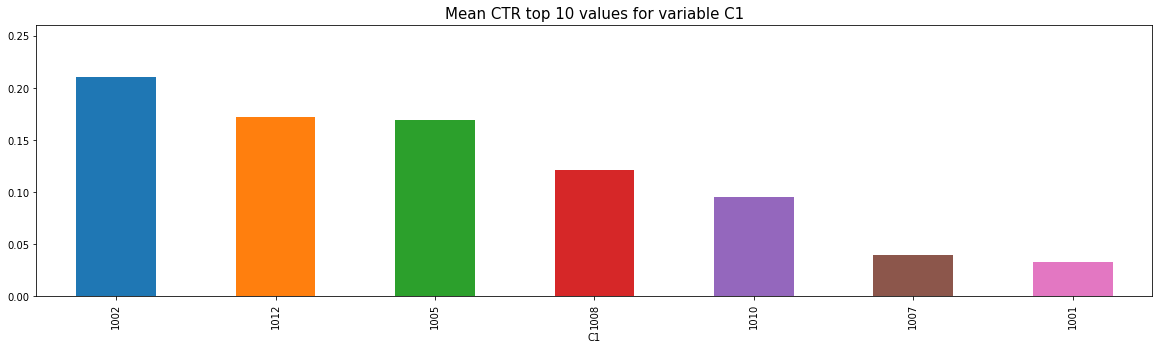

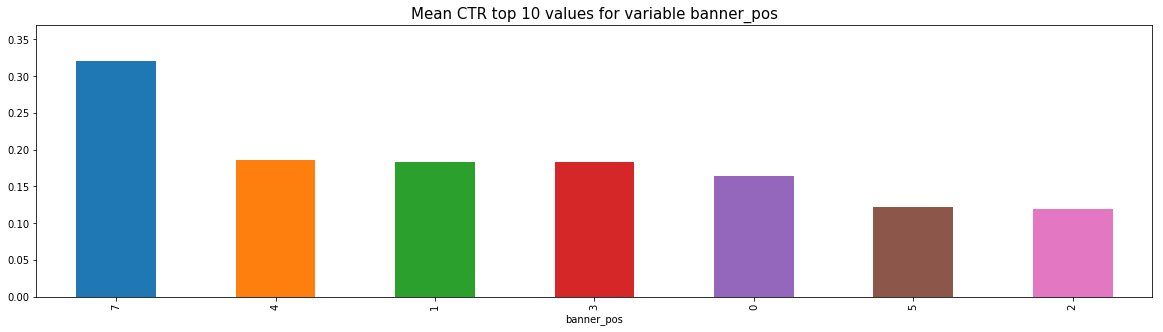

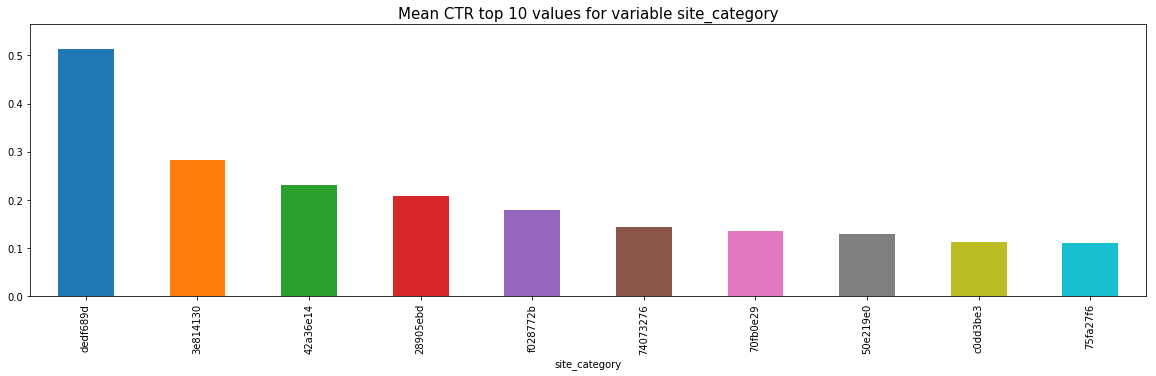

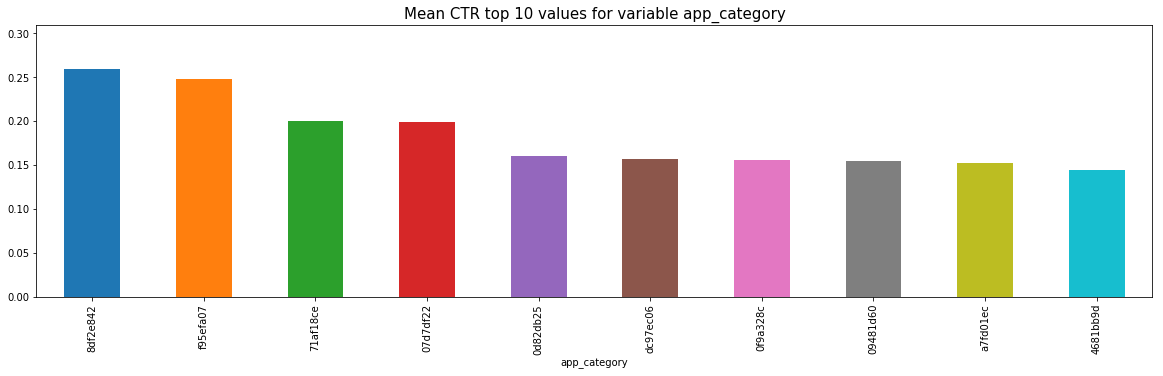

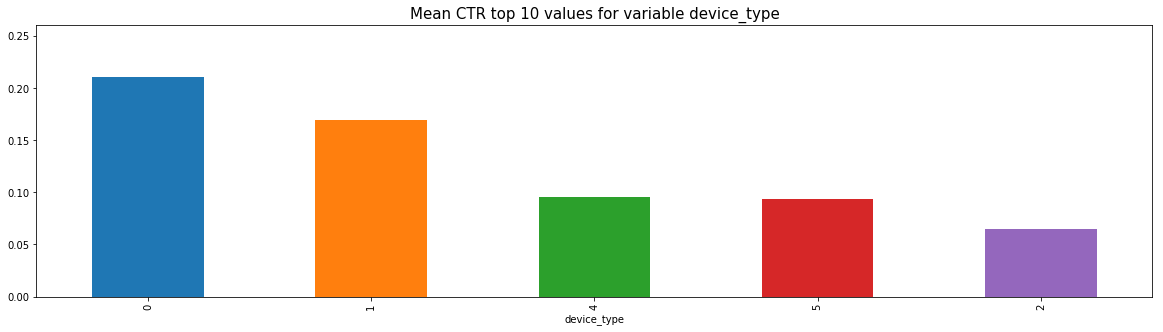

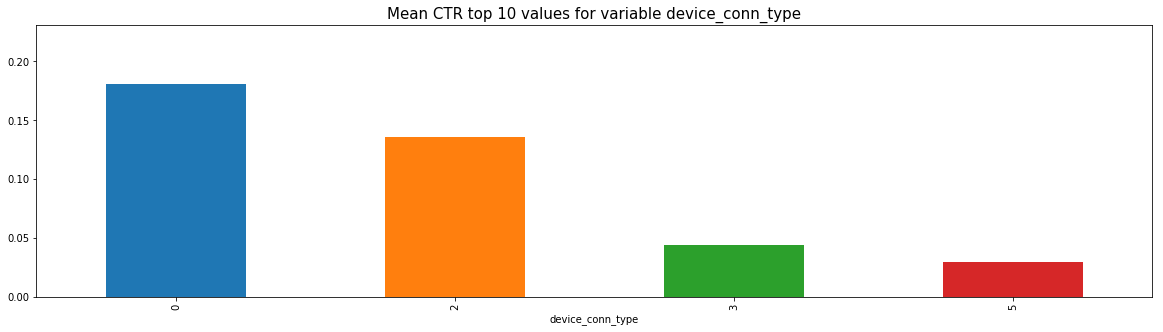

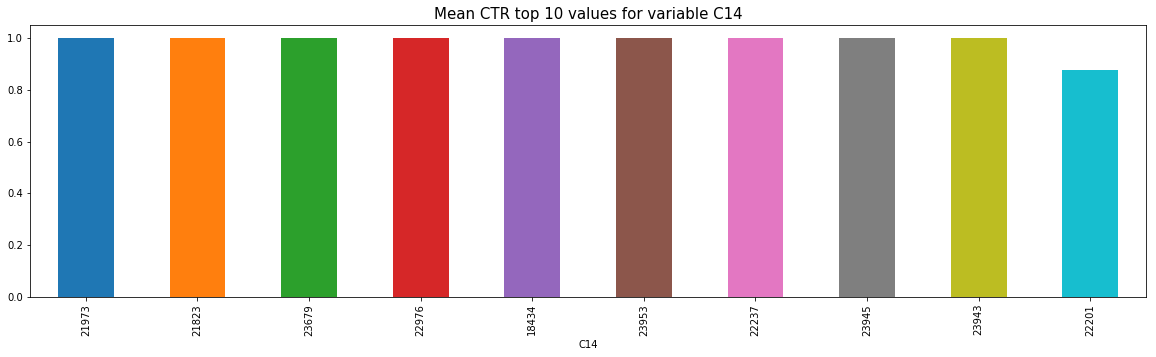

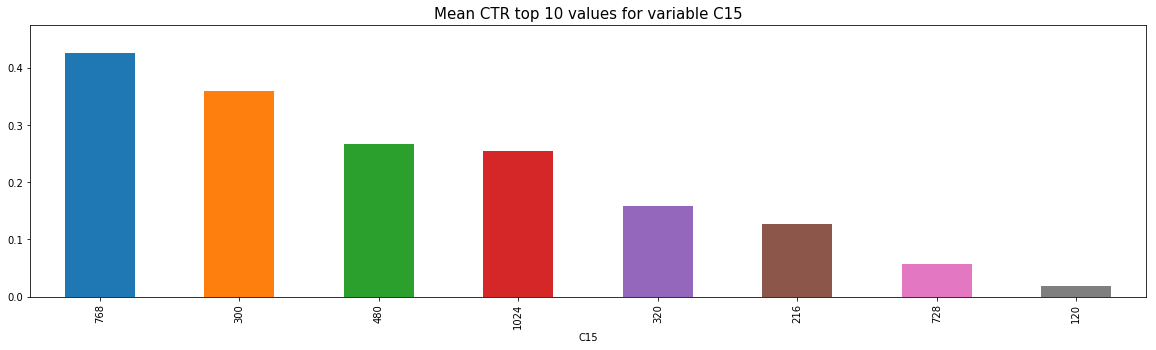

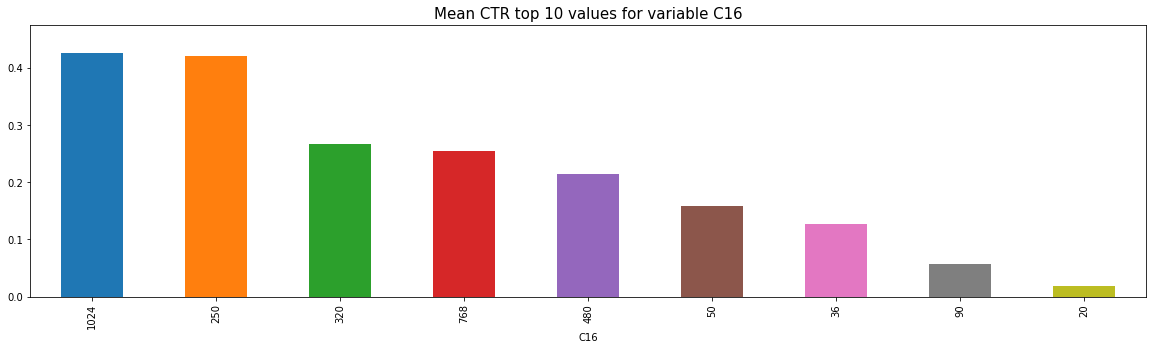

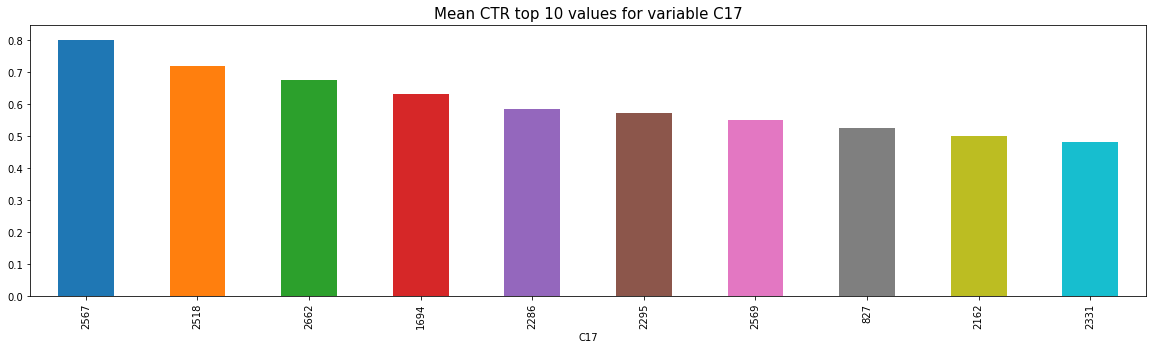

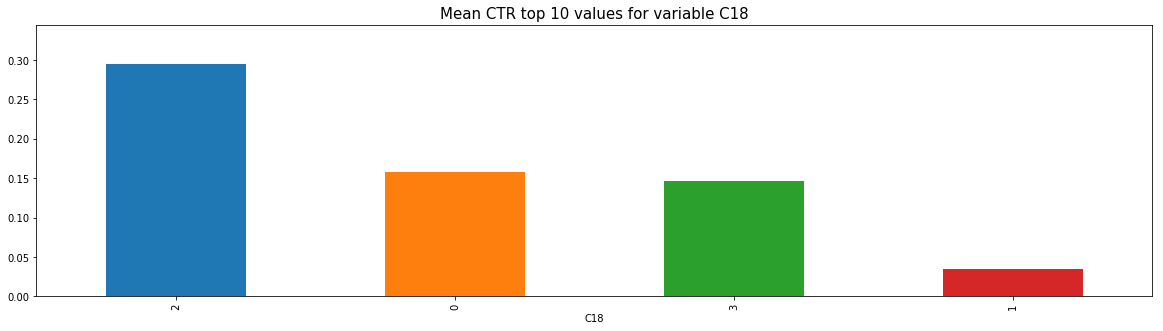

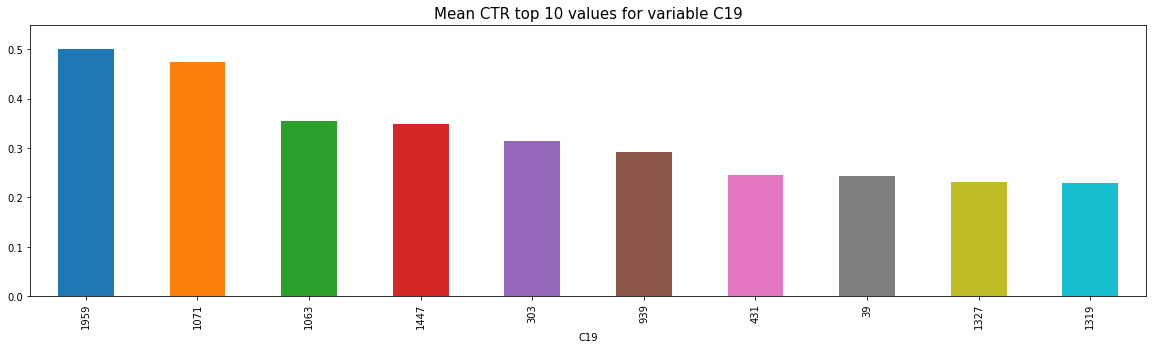

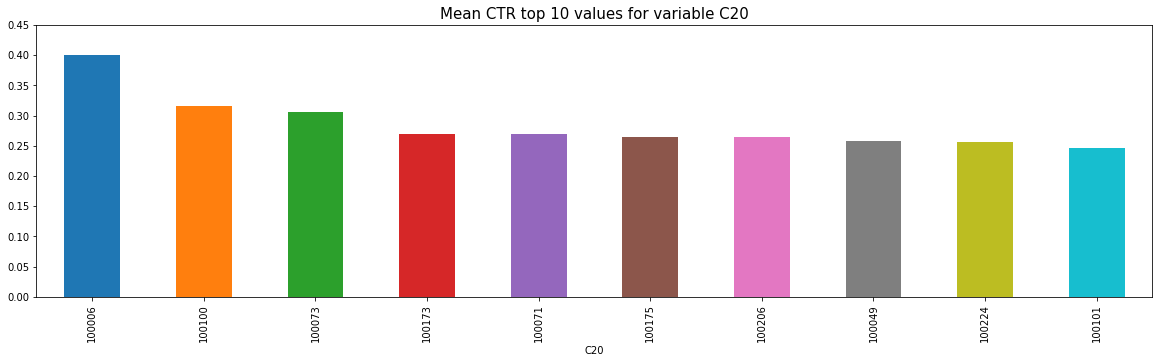

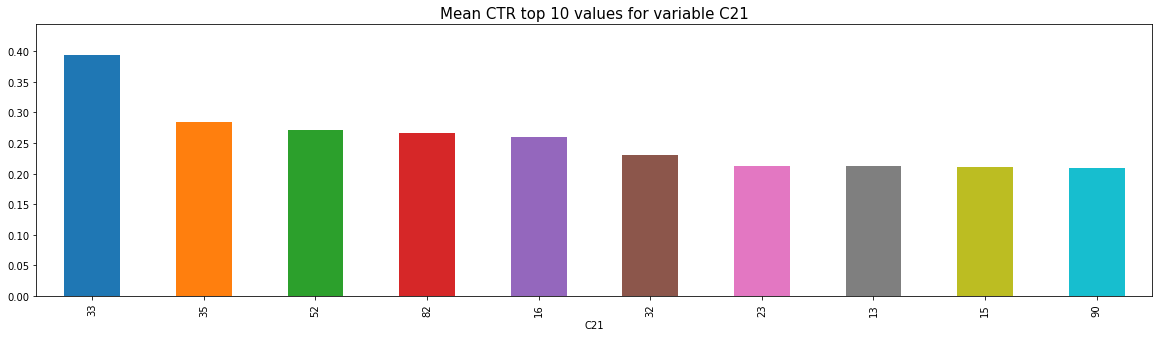

In [6]:
for cat in df.columns:
    if cat not in ['id', 'click', 'hour', 'device_id', 'device_ip',
                   'device_model'] and 'id' not in cat and 'domain' not in cat and 'ip' not in cat:
        gb = df.groupby(cat)['click'].mean().sort_values(ascending=False).head(10)
        plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
        plot.set_ylim(0, np.max(gb.values) + 0.05)
        plt.title('Mean CTR top 10 values for variable %s' % cat, fontsize=15)
        plt.show()

7、将"hour"字段分为"小时"、"天"、"周"

In [7]:
def get_date(x_):
    return int(str(x_)[:6])


def get_day(x_):
    return dict_day[str(x_)[4:6]]


def get_hour(x_):
    return int(str(x_)[6:])


dict_day = {'21': 2, '22': 3, '23': 4, '24': 5, '25': 6, '26': 0, '27': 1, '28': 2, '29': 3, '30': 4, '31': 5}

8、每天的CTR平均值

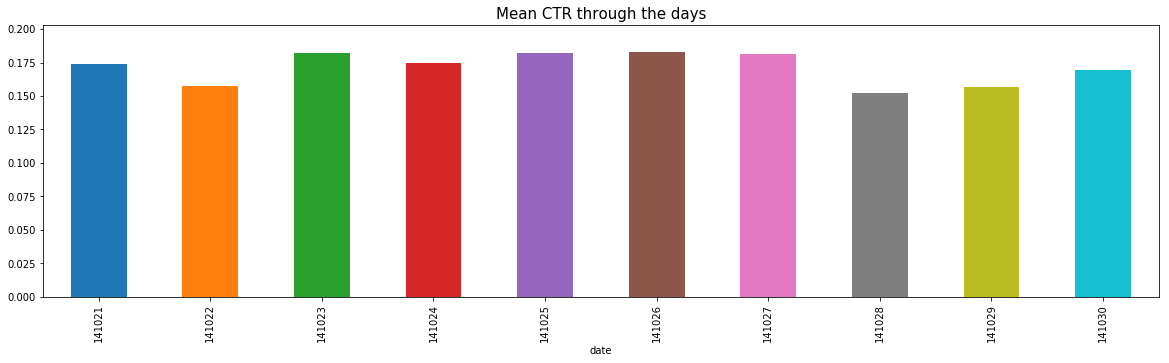

In [8]:
df['date'] = df['hour'].map(get_date)
gb = df.groupby('date')['click'].mean()
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR through the days', fontsize=15)
plt.show()

9、一个星期中每天的CTR平均值

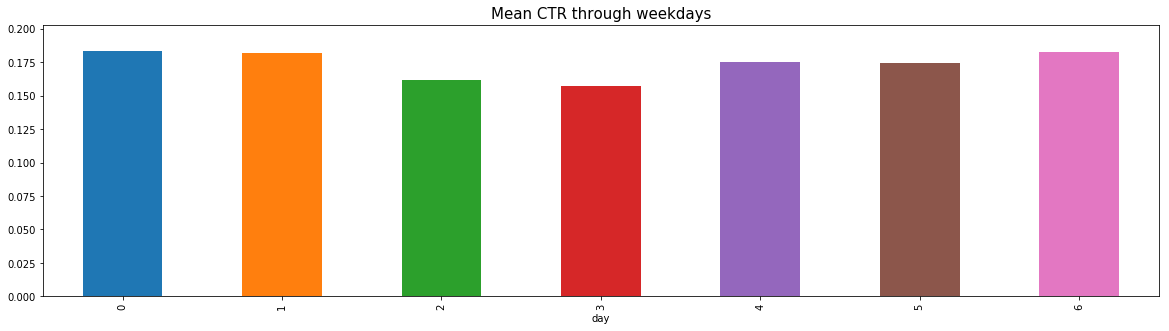

In [9]:
df['day'] = df['hour'].map(get_day)
gb = df.groupby('day')['click'].mean()
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR through weekdays', fontsize=15)
plt.show()

10、一天中每小时的CTR平均值

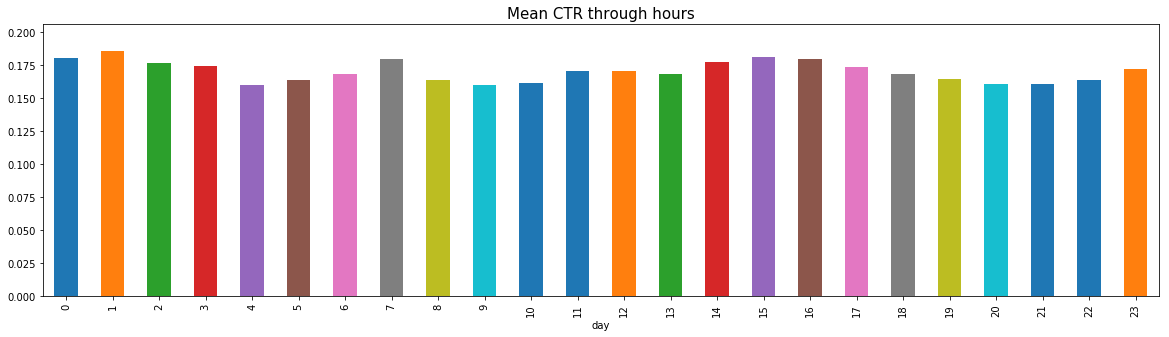

In [10]:
df['day'] = df['hour'].map(get_hour)
gb = df.groupby('day')['click'].mean()
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR through hours', fontsize=15)
plt.show()

# 中间结论：

1）类别特征以及其组合包含有CTR信息 
2）'hour'字段应该以星期和小时的方式进行处理

12、分析"site_id"和"app_id"两者对用户行为的影响

（1）按照"site_id"字段中的不同类别进行分组并计数，并显示top 10

In [11]:
df.groupby('site_id')['click'].count().sort_values(ascending=False).head(10)

site_id
85f751fd    14596137
1fbe01fe     6486150
e151e245     2637747
d9750ee7      963745
5b08c53b      913325
5b4d2eda      771360
856e6d3f      765891
a7853007      461311
b7e9786d      369099
5ee41ff2      349008
Name: click, dtype: int64

（2）按照"app_id"字段中的不同类别进行分组并计数，并显示top 10

In [12]:
df.groupby('app_id')['click'].count().sort_values(ascending=False).head(10)

app_id
ecad2386    25832830
92f5800b     1555283
e2fcccd2     1129016
febd1138      759098
9c13b419      757812
7358e05e      615635
a5184c22      491457
d36838b1      457572
685d1c4c      408515
54c5d545      397693
Name: click, dtype: int64

（3）计算site_id为85f751fd占总数据的比例

In [15]:
var1 = df[df['site_id'] == '85f751fd'].shape[0] / df.shape[0]
print(var1)

0.3610316583156824


（4）计算app_id为ecad2386占总数据的比例

In [16]:
var2 = df[df['app_id'] == 'ecad2386'].shape[0] / df.shape[0]
print(var2)

0.6389683416843176


（5）3）和4）的比例之和

In [17]:
var3 = df[df['site_id'] == '85f751fd'].shape[0] / df.shape[0] + df[df['app_id'] == 'ecad2386'].shape[0] / df.shape[0]
print(var3)

1.0


# 中间结论
'site_id'为85f751fd)占总数据量的33%,'app_id为ecad2386占总数据量的67%。因此,可以得到以下结论,即'site_id'为85f751fd代表mobile
用户, 'app_id'为ecad2386代表app用户，同时就意味着两者不回同时出现，也就意味着“app_id”和“si te_id”两个特征需要给予重点关注。

13、mobile用户的平均CTR

In [18]:
df[df['site_id'] == '85f751fd']['click'].mean()

0.11882644017386244

14、app用户的平均CTR

In [19]:
df[df['site_id'] != '85f751fd']['click'].mean()

0.19861002453080054

15、app用户和mobile用户的平均ctr比较

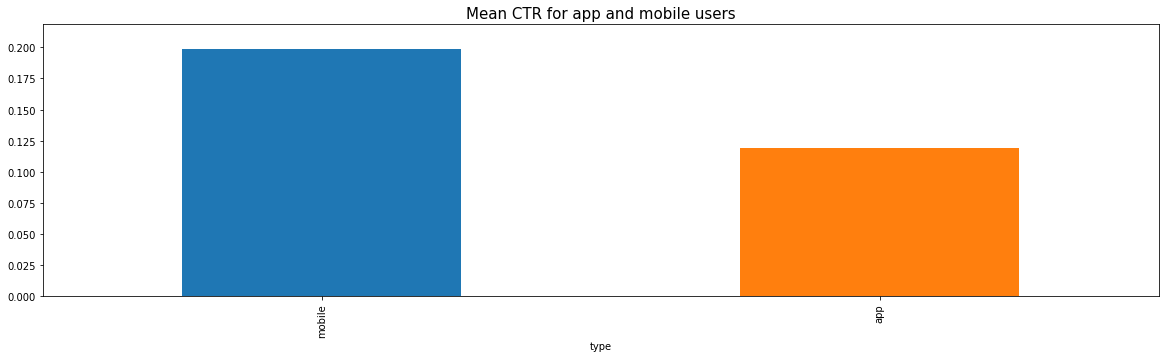

In [21]:
df['type'] = df['site_id'].map(lambda x_: 'mobile' if x_ != '85f751fd' else 'app')
gb = df.groupby('type')['click'].mean().sort_values(ascending=False)
plot = gb.plot(kind='bar', title='Scores', figsize=(20, 5))
plot.set_ylim(0, np.max(gb.values) + 0.02)
plt.title('Mean CTR for app and mobile users', fontsize=15)
plt.show()

# 中间结论
app用户和mobile用户的平均CTR几乎相差2倍，换句话说意味着app用户和mobile用户在ctr中差别很大，考虑使用不同的处理方式

In [24]:
dtype = {
    'id': np.str, 'click': np.bool, 'hour': np.str,
    'C1': np.uint16, 'banner_pos': np.uint16,
    'site_id': np.str, 'site_domain': np.str, 'site_category': np.str,
    'app_id': np.str, 'app_domain': np.str, 'app_category': np.str,
    'device_id': np.str, 'device_ip': np.str, 'device_model': np.str, 'device_type': np.uint16,
    'device_conn_type': np.uint16,
    'C14': np.uint16, 'C15': np.uint16, 'C16': np.uint16, 'C17': np.uint16,
    'C18': np.uint16, 'C19': np.uint16, 'C20': np.uint32, 'C21': np.uint16
}

In [25]:
df = pd.read_csv(train_data_path, dtype=dtype)

17、统计点击和未点击的数量差异

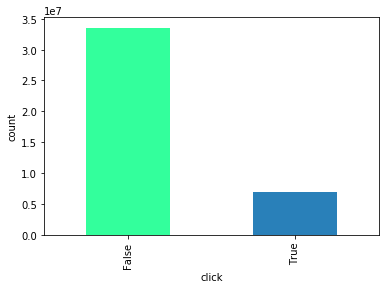

In [26]:
click_ratio = df.groupby('click').click.count()
click_ratio.plot(kind='bar', color=['#33FF9C', '#2980B9'])
plt.ylabel("count")
plt.show()

点击的数量和未点击的数量的比例为2:8，可以考虑使用下采样

18、统计各匿名特征中各种不同类别的点击和未点击的比例（包括'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'）

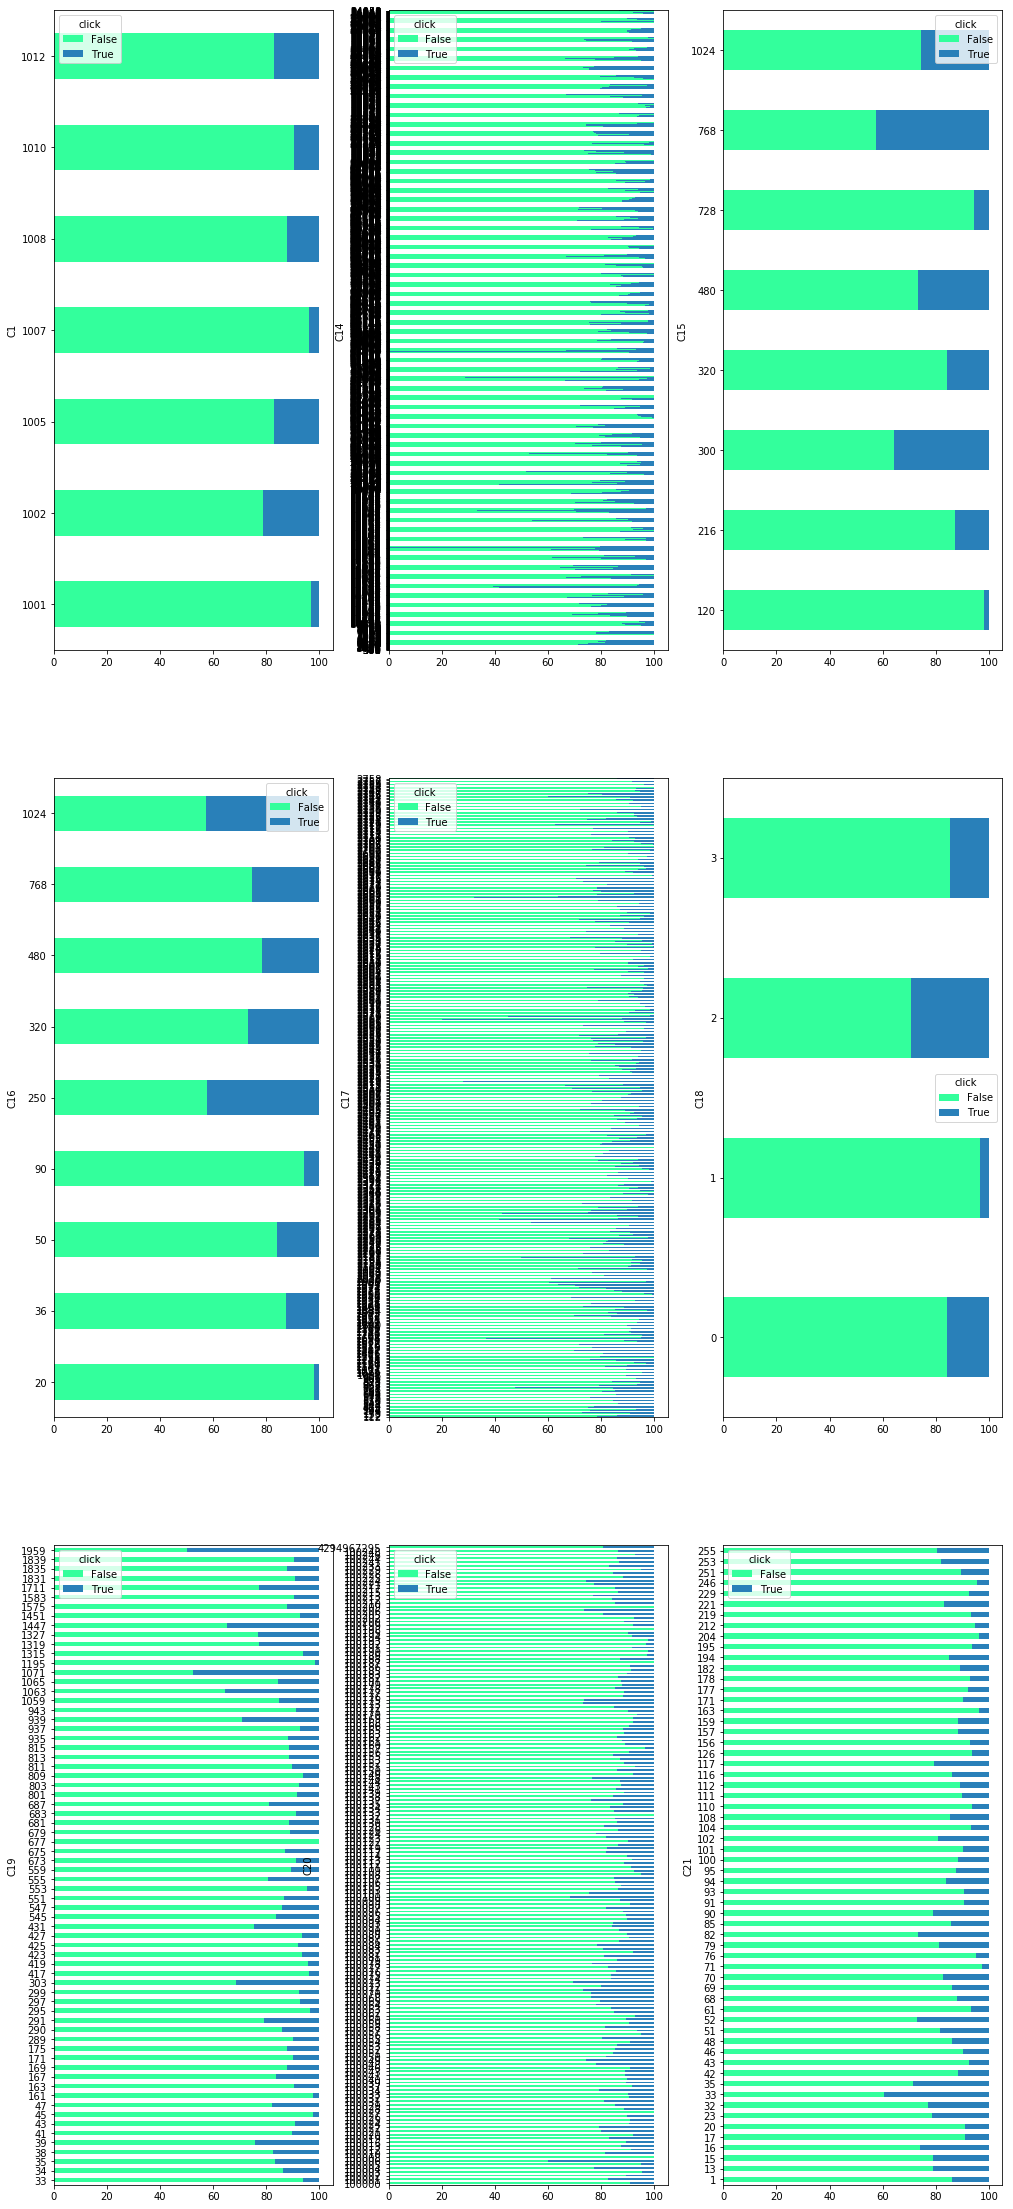

In [27]:
anonymize_features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

fig, axes = plt.subplots(figsize=(17, 40), nrows=3, ncols=3)

x = 0
for row in np.arange(3):
    for colum in np.arange(3):
        count_df = df.groupby([anonymize_features[x], 'click']).click.count()
        sum_df = df.groupby([anonymize_features[x]]).click.count()
        ratio_df = (count_df / sum_df) * 100
        ratio_df.unstack().plot(kind='barh', color=['#33FF9C', '#2980B9'], stacked=True, ax=axes[row, colum])
        x = x + 1
plt.show()

匿名类别特征C14、C17、C20和C21具有大量的属性，因此可能对正标签具有更大的影响，需要重点关注

19、每天中每小时的点击次数和未点击次数统计

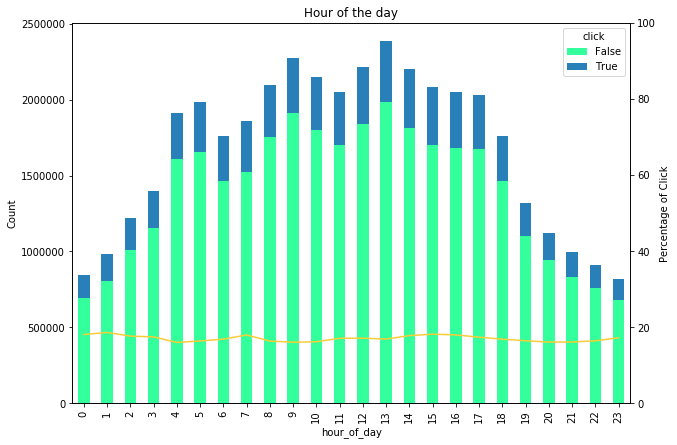

In [28]:
df['hour'] = df['hour'].apply(lambda x_: pd.datetime.strptime(x_, '%y%m%d%H'))
df['hour_of_day'] = df['hour'].apply(lambda x_: x_.hour)

fig, ax0 = plt.subplots(figsize=(10, 7))
ax1 = ax0.twinx()

hourday_df = df.groupby(['hour_of_day', 'click']).size()
hourday_df.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title="Hour of the day", ax=ax0)

click_by_hour = (df[df.click == 1].groupby(['hour_of_day']).size() / df.groupby(['hour_of_day']).size()) * 100

click_by_hour.plot(kind='line', ylim=(0, 100), ax=ax1, color='#FACC37')

ax0.set_ylabel("Count")
ax1.set_ylabel("Percentage of Click")

plt.show()

统计的目的是了解点击率是否在一天中的任何特定时间增加。
点击率保持在16%-18%的范围内，表明点击率的分布在一天中是相似的。

20、对“id”和“device_ip”进行统计

In [29]:
df[['id', 'device_ip']].groupby(['id', 'device_ip']).device_ip.count().reset_index(name="count").describe()

,count
count,40428967.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


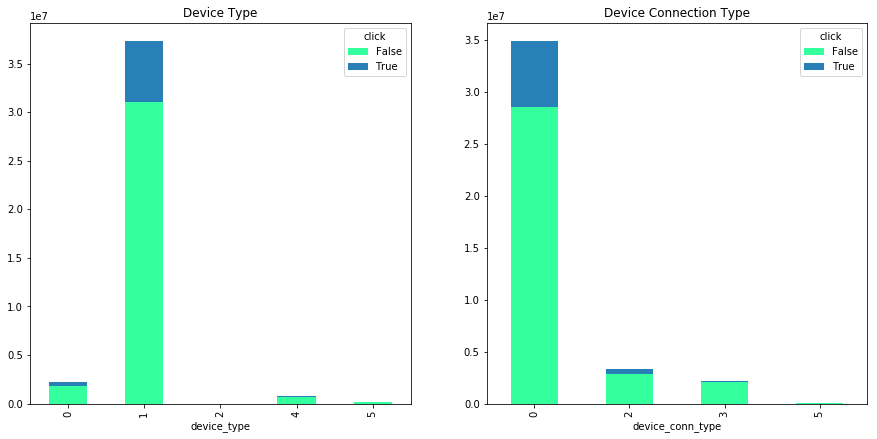

In [30]:
_, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)

device_type = df.groupby(['device_type', 'click']).size()
device_type.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title='Device Type', ax=axes[0])

device_conn = df.groupby(['device_conn_type', 'click']).size()
device_conn.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title='Device Connection Type',
                           ax=axes[1])

plt.show()

设备IP是唯一的，对于设备类型和设备连接类型来说，其标准差为零，不太频繁的属性似乎不能很好的反映正标签

21、对Banner Position（广告位置）进行统计

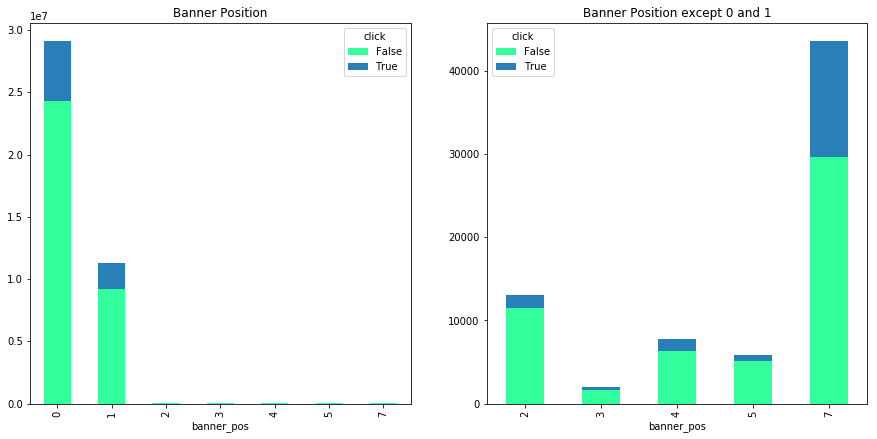

In [31]:
_, axes = plt.subplots(figsize=(15, 7), nrows=1, ncols=2)

banner_pos = df.groupby(['banner_pos', 'click']).size()
banner_pos.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'], title='Banner Position', ax=axes[0])

banner_pos_zoom = banner_pos.iloc[4:]
banner_pos_zoom.unstack().plot(kind='bar', stacked=True, color=['#33FF9C', '#2980B9'],
                               title='Banner Position except 0 and 1', ax=axes[1])

plt.show()

位置在0和1是最常见的。位置7能够更好的反映正标签。

22、对与site和app相关的特征进行分析

In [32]:
df[['app_id', 'app_domain', 'app_category']].describe()

,app_id,app_domain,app_category
count,40428967,40428967,40428967
unique,8552,559,36
top,ecad2386,7801e8d9,07d7df22
freq,25832830,27237087,26165592


In [33]:
df[['site_id', 'site_domain', 'site_category']].describe()

,site_id,site_domain,site_category
count,40428967,40428967,40428967
unique,4737,7745,26
top,85f751fd,c4e18dd6,50e219e0
freq,14596137,15131739,16537234


In [34]:
print(df[(df.app_id == 'ecad2386') & (df.site_id == '85f751fd')].id.count())

0


site和app的ID是互补的。把这些特征合并在一起可以节省空间，且两者不可能同时出现

## 2、特征结果联合分布

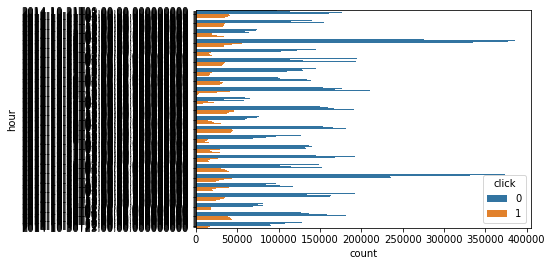

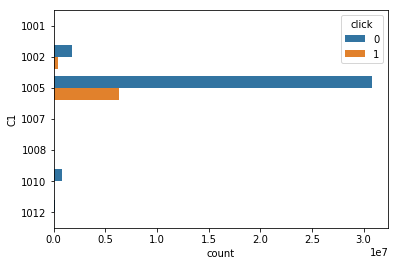

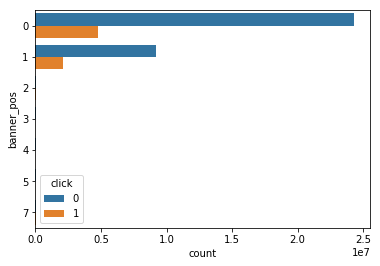

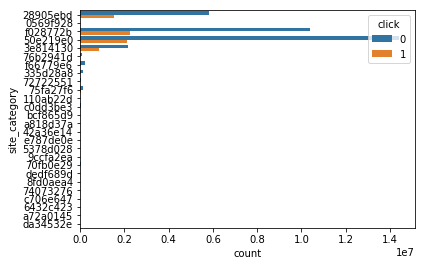

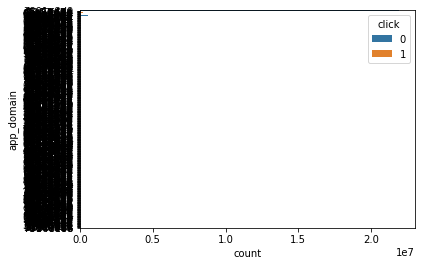

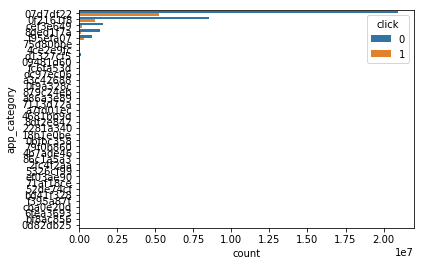

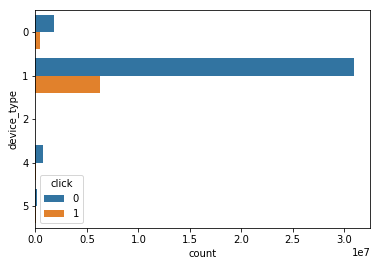

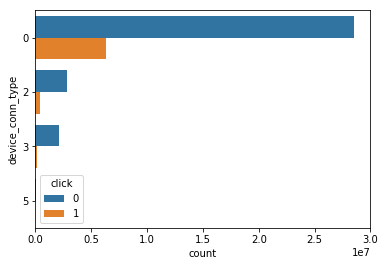

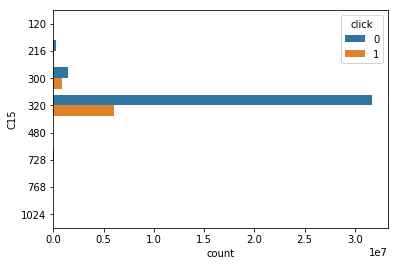

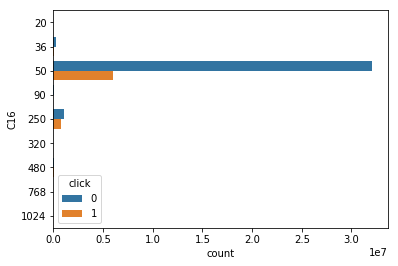

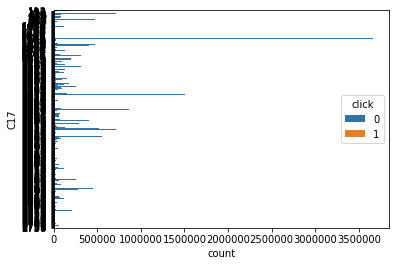

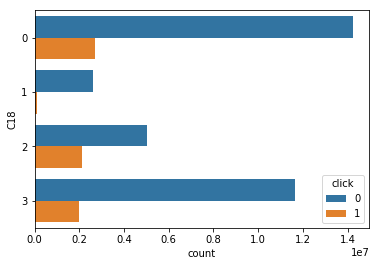

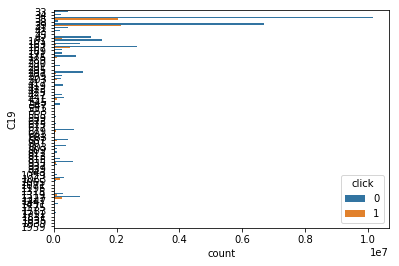

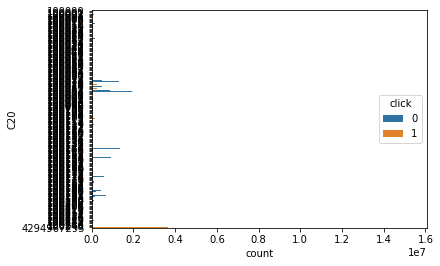

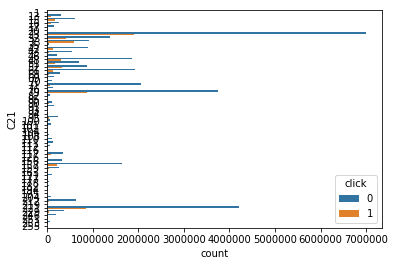

In [44]:
var=[ 'hour', 'C1', 'banner_pos', 'site_category',  'app_domain', 'app_category', 
        'device_type', 'device_conn_type', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
for v in var:
    #按多少的顺序排列的特征的列表
    sns.countplot(y=v,hue='click',hue_order=[0,1],data=df)
    plt.show()

## 3、重点关注特征

### 取概率提升比达到30%的特征，即概率提升5%的特征作为重点关注的特征，为避免样本没有代表性，要求该特征的样本数大于10，其它特征也有一定作用（比如hour），但作用可能没这么明显，对重点特征可在特征工程时候着重考虑。

In [45]:
for v in var:
    print('\n%s属性的取值和次数'%v)
    P=pd.concat([df[v].value_counts(),df[v].value_counts(normalize=True),\
                   train_df_click[v].value_counts(normalize=True)],\
                   axis=1,join_axes=[df[v].value_counts().index],keys=['特征分布','P_C','P_C|A']).fillna(0)
    #P(A│ci)=(P(ci│A)P(A))/(P(ci))
    P['P_A|C']=(P['P_C|A']*P_A)/P['P_C']
    P['概率提升比%']=(P['P_A|C']-P_A)*100/P_A
    P=P[(P['概率提升比%']>30)&(P['特征分布']>10)]
    print(P.sort_values(by='概率提升比%',ascending=False))


hour属性的取值和次数
Empty DataFrame
Columns: [特征分布, P_C, P_C|A, P_A|C, 概率提升比%]
Index: []

C1属性的取值和次数
Empty DataFrame
Columns: [特征分布, P_C, P_C|A, P_A|C, 概率提升比%]
Index: []

banner_pos属性的取值和次数
    特征分布       P_C     P_C|A   P_A|C     概率提升比%
7  43577  0.001078  0.002032  0.3201  88.509688

site_category属性的取值和次数
             特征分布       P_C     P_C|A     P_A|C      概率提升比%
dedf689d    24500  0.000606  0.001834  0.514000  202.699042
3e814130  3050306  0.075449  0.125745  0.283003   66.662768
42a36e14     2515  0.000062  0.000085  0.231014   36.046092

app_domain属性的取值和次数
            特征分布           P_C         P_C|A     P_A|C      概率提升比%
5576cc84      21  5.194295e-07  2.476305e-06  0.809524  376.735568
999f1fac      33  8.162464e-07  3.204631e-06  0.666667  292.605762
99b4c806   10041  2.483615e-04  9.372088e-04  0.640773  277.356658
391ef1c3      11  2.720821e-07  1.019655e-06  0.636364  274.760045
73fc6786     105  2.597148e-06  9.613892e-06  0.628571  270.171147
eaaf6d12      53  1.310941e-06  4.8

       特征分布       P_C     P_C|A     P_A|C      概率提升比%
33  1497559  0.037042  0.085930  0.393919  131.982326
35    46707  0.001155  0.001935  0.284454   67.517508
52  1203050  0.029757  0.047446  0.270743   59.442713
82    71393  0.001766  0.002767  0.266091   56.703003
16   347178  0.008587  0.013123  0.259501   52.822317
32  1783343  0.044111  0.059836  0.230343   35.651123
